# <div style=" text-align: center; font-weight: bold">Phase 04: Modelling</div>



In the `Price` column of the dataframe, we can see that there is many value is `Thỏa thuận`, In this part, we will model to predict the price of real estates in type `Căn hộ chung cư` that have price `Thỏa thuận` based on its attribute.

## **Import necessary Python modules**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### **Read the data from file**
First, read the clean data that we cleaned before to a dataframe.

In [37]:
real_estate_for_sale_df = pd.read_csv('../Data/cleaned_real_estate_for_sale.csv', encoding='utf-8')

### **Preprocessing data**
- First, we have to extract the real estate that in type `Căn hộ chung cư`


In [38]:
apartment_df = real_estate_for_sale_df[real_estate_for_sale_df['Type'] == 'Căn hộ chung cư']

#### Remove features that is not necessary for the model:
- We can see that, the column `Project` have many seperated values, also the `Posting date` column doesn't much meaning, so we will drop them.

In [39]:
apartment_df = apartment_df.copy()
apartment_df.drop(columns= ['Project', 'Posting date'], axis= 1, inplace= True)

Beside that, as we discuss before, for `Căn hộ chung cư`, the column `Floor` `Furniture` and `Legal` does not affect a lot to the price, so we also drop them

In [40]:
apartment_df.drop(columns= [ 'Floor(Tầng)', 'Furniture', 'Legal'], axis= 1, inplace= True)

### Convert all the non-numeric columns into numeric columns:
Now, we will convert all the columns in dataframe in to numerical data types


#### Normalize the value 
For this normalize, we use `One hot encoding`

In [41]:
apartment_df = pd.get_dummies(apartment_df, columns=['District'])
apartment_df.drop(columns=['Type'], inplace= True)

Now, with the purpose of predict the price of real estate that have the price is `Thỏa thuận` (currently is `NaN`), we will seperate the dataframe into two part, one that price this  `Thỏa thuận` and all the others.

In [84]:
processed_apartment_df = apartment_df[apartment_df['Price(VNĐ)'].notna()]
data_to_predict_df = apartment_df[apartment_df['Price(VNĐ)'].isna()]


Also, with the `Price` column, the unit of it currently is `VNĐ`, but for the better performance of the model, we can reduce the price by convert it into `Triệu` 

In [43]:
processed_apartment_df .loc[:,'Price(VNĐ)'] = processed_apartment_df.loc[:,'Price(VNĐ)'] / 1000000
processed_apartment_df.rename(columns= {'Price(VNĐ)' : 'Price (Million)'}, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14372\1906477762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_apartment_df.rename(columns= {'Price(VNĐ)' : 'Price (Million)'}, inplace=True)


Now we have `processed_apartment_df`, let's start to build a model

## **Build model**

In this section, we will try to build and train in these model:
- **Linear Regression**
- **Ridge Regression**
- **Lasso Regression**
- **ElasticNet Regression**
- **Decision Tree Regression**
- **Random Forest Regression**

### **Model selection:**

First, we will prepare the data for the linear regression model. First, we take the `Y` data frame is the `Price`, and `X` is all the attributes `Area`, `Bedroom`, `Toilet`, `District` 

In [44]:

X = processed_apartment_df.drop(columns=['Price (Million)'])
y = processed_apartment_df['Price (Million)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now, we will use `K Fold Cross Validation` to find the best model for our data.

In [45]:
# Define score matrix
scoring_metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

# Prepare models
model_linear = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()
model_elastic_net = ElasticNet()
model_dtree = DecisionTreeRegressor()
model_rforest = RandomForestRegressor()

# Compare models
model_linear_score = cross_validate(model_linear, X, y, cv = 7, scoring = scoring_metrics)
model_ridge_score = cross_validate(model_ridge,  X, y, cv = 7, scoring = scoring_metrics)
model_lasso_score = cross_validate(model_lasso,  X, y, cv = 7, scoring = scoring_metrics)
model_elastic_net_score = cross_validate(model_elastic_net, X, y, cv = 7, scoring = scoring_metrics)
model_dtree_score = cross_validate(model_dtree,  X, y, cv = 7, scoring = scoring_metrics)
model_rforest_score = cross_validate(model_rforest, X, y, cv = 7, scoring = scoring_metrics)

In [46]:
# Comparing our models
model_test_results = pd.DataFrame(columns=['model_linear_score', 'model_ridge_score', 'model_lasso_score', 'model_elastic_net_score', 'model_dtree_score', 'model_rforest_score'],
                                  index=model_dtree_score.keys())

model_test_results['model_linear_score'] = pd.DataFrame(model_linear_score).abs().mean().to_numpy().round(3)
model_test_results['model_ridge_score'] = pd.DataFrame(model_ridge_score).abs().mean().to_numpy().round(3)
model_test_results['model_lasso_score'] = pd.DataFrame(model_lasso_score).abs().mean().to_numpy().round(3)
model_test_results['model_elastic_net_score'] = pd.DataFrame(model_elastic_net_score).abs().mean().to_numpy().round(3)
model_test_results['model_dtree_score'] = pd.DataFrame(model_dtree_score).abs().mean().to_numpy().round(3)
model_test_results['model_rforest_score'] = pd.DataFrame(model_rforest_score).abs().mean().to_numpy().round(3)

model_test_results


,model_linear_score,model_ridge_score,model_lasso_score,model_elastic_net_score,model_dtree_score,model_rforest_score
fit_time,0.011,0.007,0.234,0.042,0.030,2.468
score_time,0.003,0.003,0.003,0.002,0.002,0.034
test_neg_mean_squared_error,6771212.424,6770982.712,6771839.149,8815554.440,6201388.256,5019762.460
test_neg_mean_absolute_error,1566.103,1565.688,1564.715,1757.392,1126.335,1065.895
test_r2,0.659,0.659,0.659,0.557,0.686,0.749


Among model, we can see that `Random Forest` give me the best `R2 score` with over 0.7, but also take the most time (upto 2 seconds to train and 0.032 seconds to test).
Because of all model have the score nearly the same, so we will use all of them to buil the model.

Before that, we want to tune and getthe best hyperparameter for each model. For this purpose, we will use `GridSearchCV` to do this task
Let's make some define for the model.

In [47]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor()
}

param_grids = {
    'Linear Regression': {'fit_intercept': [True, False],},
    'Ridge Regression': {'alpha': [0.1, 0.5, 0.75, 1, 10]},
    'Lasso Regression': {'alpha': [0.1, 0.5, 0.75, 1, 10]},
    'ElasticNet Regression': {'alpha': [0.1, 0.5, 1, 10],
                               'l1_ratio': [0.25, 0.5, 0.75, 1]},
    'Decision Tree Regression': {'max_depth': [None, 5, 10, 15],
                                 'min_samples_split': [2, 5, 10],
                                 'min_samples_leaf': [1, 2, 4],},
    'Random Forest Regression': {'n_estimators': [10, 50, 100],
                                  'max_depth': [None, 5, 10, 15],
                                  'min_samples_split': [2, 5, 10],
                                  'min_samples_leaf': [1, 2, 4]}
}


Now. let's find out the best hyperparameter for each model

In [48]:

best_params_dict = {}

for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name],return_train_score=False, cv=5)
    grid_search.fit(X, y)

    best_params_dict[model_name] = {
        'best_score':  grid_search.best_score_,
        'best_params':  grid_search.best_params_
    }

best_params_dict

{'Linear Regression': {'best_score': 0.6570090896565756,
  'best_params': {'fit_intercept': True}},
 'Ridge Regression': {'best_score': 0.6571061150313016,
  'best_params': {'alpha': 10}},
 'Lasso Regression': {'best_score': 0.6570107029921954,
  'best_params': {'alpha': 0.5}},
 'ElasticNet Regression': {'best_score': 0.6570107029921954,
  'best_params': {'alpha': 0.5, 'l1_ratio': 1}},
 'Decision Tree Regression': {'best_score': 0.7290000468100996,
  'best_params': {'max_depth': None,
   'min_samples_leaf': 4,
   'min_samples_split': 2}},
 'Random Forest Regression': {'best_score': 0.7498322488550184,
  'best_params': {'max_depth': None,
   'min_samples_leaf': 1,
   'min_samples_split': 10,
   'n_estimators': 100}}}

With the best hyperparameters, now we start to build models.

For each model, we will run the model in train_set and test_set, for each set, we will find scores bellow to validate the effeciency of the model:
- `MAE`: Mean Absolute Error
- `MSE` : Mean Square Error
- `R2 score` : R-Square score

In [49]:
def find_scores(y, y_pred):
    mae_score = mean_absolute_error(y, y_pred).round(5)
    mse_score = mean_squared_error(y, y_pred).round(5)
    r2_value = r2_score(y, y_pred).round(5)
    # print(r2)

    return mae_score, mse_score, r2_value

def scatter_plot(y_true, y_pred,  title):
    
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_pred,alpha= 0.5)
    plt.title(title)
    plt.xlabel('Actual prices')
    plt.ylabel('Predicted prices')
    
    sns.despine()
    fig = plt.gcf()
    fig.set_facecolor('#ffe6cc')
    plt.show()




### **1. Multiple Linear Regression:**

In [50]:
best_params = best_params_dict['Linear Regression']['best_params']
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

MAE Train: 1550.57949
MSE Train: 6687914.44123
R2 score: 0.66559


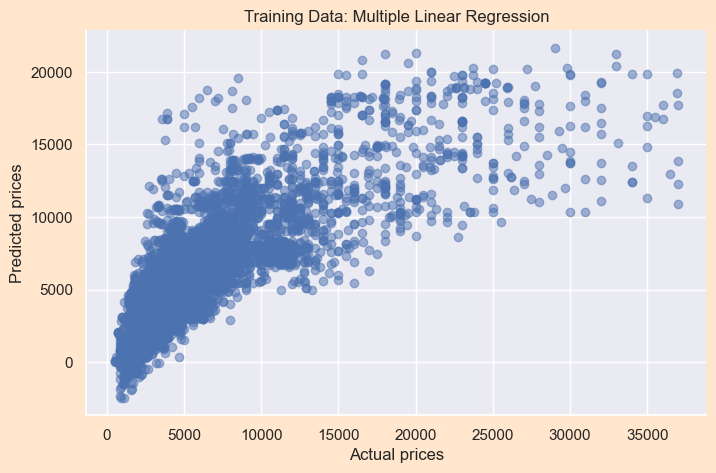

In [70]:
y_pred_train = model.predict(X_train)
mae_score, mse_score, r2_value = find_scores(y_train, y_pred_train)

print(f'MAE Train: {mae_score}')
print(f'MSE Train: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_train, y_pred_train, title="Training Data: Multiple Linear Regression")

MAE Test: 1584.71726
MSE Test: 6870383.10517
R2 score: 0.6504


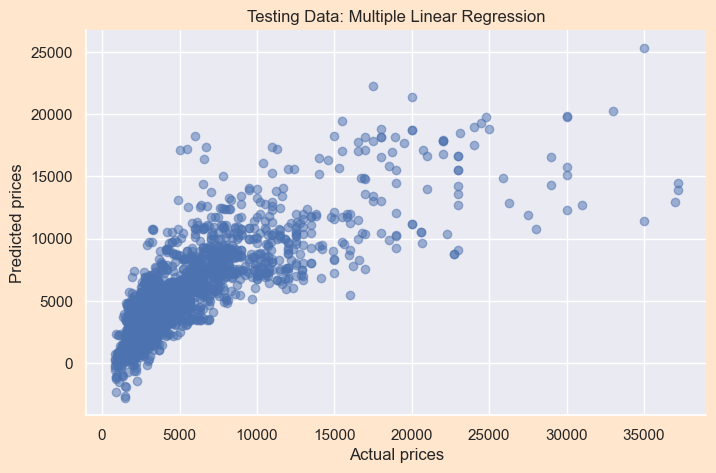

In [52]:
y_pred_test = model.predict(X_test)
mae_score, mse_score, r2_value = find_scores(y_test.values, y_pred_test)

print(f'MAE Test: {mae_score}')
print(f'MSE Test: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_test, y_pred_test, title="Testing Data: Multiple Linear Regression")

### **Ridge Regression:**

In [53]:

best_params = best_params_dict['Ridge Regression']['best_params']

model = Ridge(**best_params)
model.fit(X_train, y_train)

Ridge(alpha=10)

MAE Train: 1548.27868
MSE Train: 6690402.00315
R2 score: 0.66547


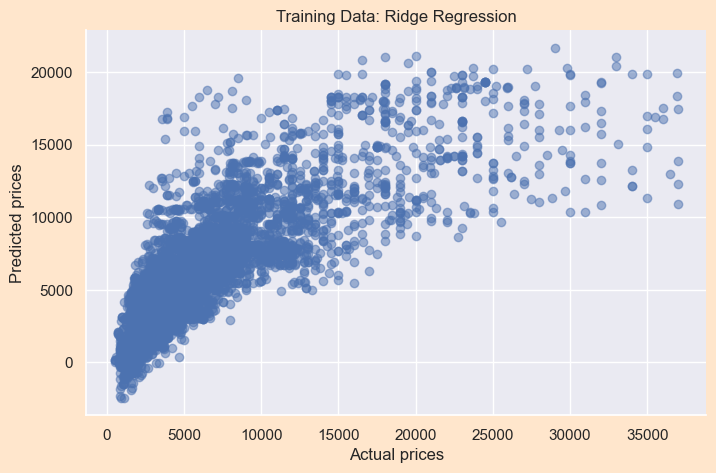

In [54]:
y_pred_train = model.predict(X_train)
mae_score, mse_score, r2_value = find_scores(y_train.values, y_pred_train)

print(f'MAE Train: {mae_score}')
print(f'MSE Train: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_train, y_pred_train, title="Training Data: Ridge Regression")

MAE Train: 1580.43248
MSE Train: 6855720.69157
R2 score: 0.65114


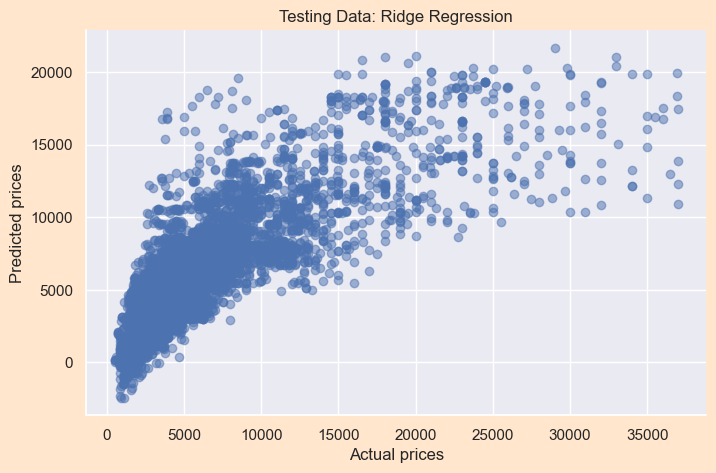

In [55]:
y_pred_test = model.predict(X_test)
mae_score, mse_score, r2_value = find_scores(y_test.values, y_pred_test)

print(f'MAE Train: {mae_score}')
print(f'MSE Train: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_train, y_pred_train, title="Testing Data: Ridge Regression")

### **Lasso regression:**

In [56]:

best_params = best_params_dict['Lasso Regression']['best_params']

model = Lasso(**best_params)
model.fit(X_train, y_train)


Lasso(alpha=0.5)

MAE Train: 1550.57949
MSE Train: 6687914.44123
R2 score: 0.66559


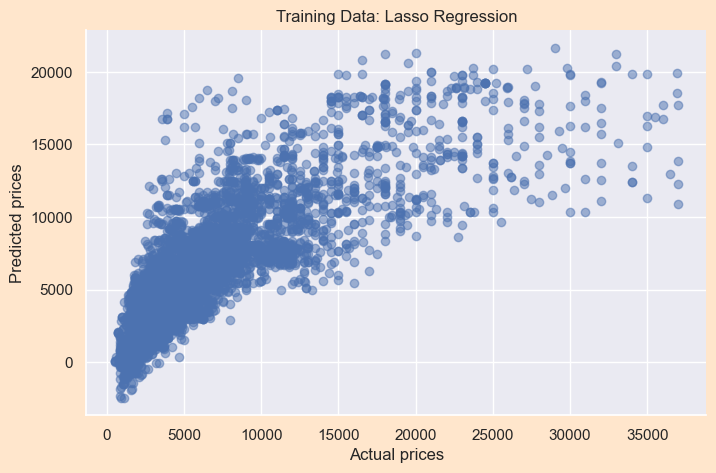

In [57]:
y_pred_train = model.predict(X_train)
mae_score, mse_score, r2_value = find_scores(y_train.values, y_pred_train)

print(f'MAE Train: {mae_score}')
print(f'MSE Train: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_train, y_pred_train, title="Training Data: Lasso Regression")

MAE Test: 1583.75311
MSE Test: 6868799.92727
R2 score: 0.65048


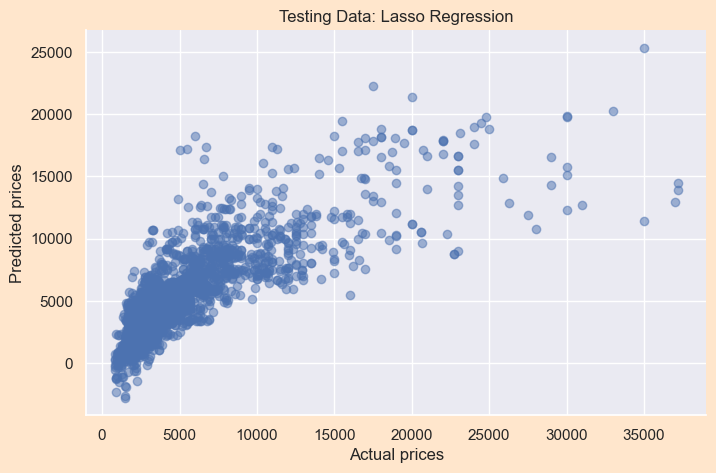

In [58]:
y_pred_test = model.predict(X_test)
mae_score, mse_score, r2_value = find_scores(y_test.values, y_pred_test)

print(f'MAE Test: {mae_score}')
print(f'MSE Test: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_test, y_pred_test, title="Testing Data: Lasso Regression")

### **ElasticNet Regression**

In [59]:

best_params = best_params_dict['ElasticNet Regression']['best_params']
best_model = ElasticNet(**best_params)
best_model.fit(X_train, y_train)

ElasticNet(alpha=0.5, l1_ratio=1)

MAE Train: 1550.57949
MSE Train: 6687914.44123
R2 score: 0.66559


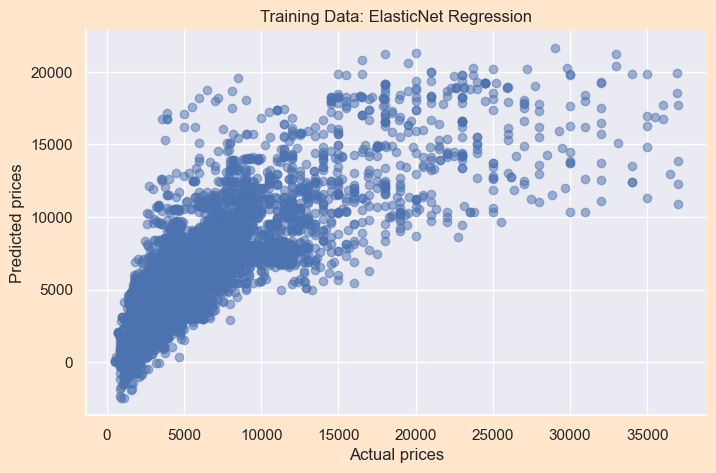

In [60]:
y_pred_train = model.predict(X_train)
mae_score, mse_score, r2_value = find_scores(y_train.values, y_pred_train)

print(f'MAE Train: {mae_score}')
print(f'MSE Train: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_train, y_pred_train, title="Training Data: ElasticNet Regression")

MAE Test: 1583.75311
MSE Test: 6868799.92727
R2 score: 0.65048


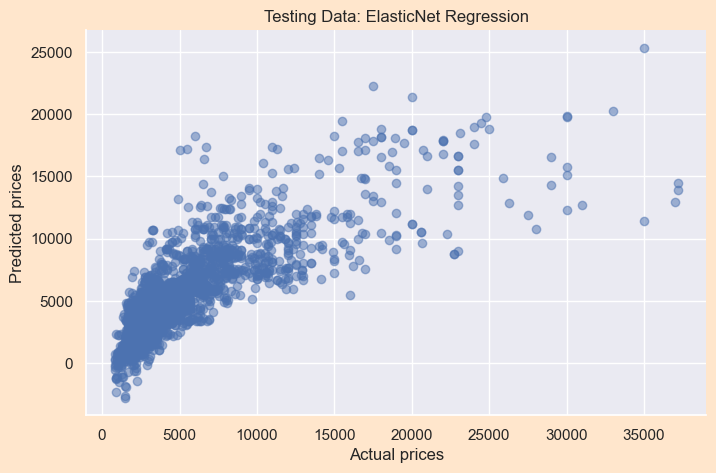

In [61]:
y_pred_test = model.predict(X_test)
mae_score, mse_score, r2_value = find_scores(y_test.values, y_pred_test)

print(f'MAE Test: {mae_score}')
print(f'MSE Test: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_test, y_pred_test, title="Testing Data: ElasticNet Regression")

### **Decision Tree Regression**

In [62]:
best_params = best_params_dict['Decision Tree Regression']['best_params']

best_model = DecisionTreeRegressor(**best_params)
best_model.fit(X_train, y_train)


DecisionTreeRegressor(min_samples_leaf=4)

MAE Train: 1550.57949
MSE Train: 6687914.44123
R2 score: 0.66559


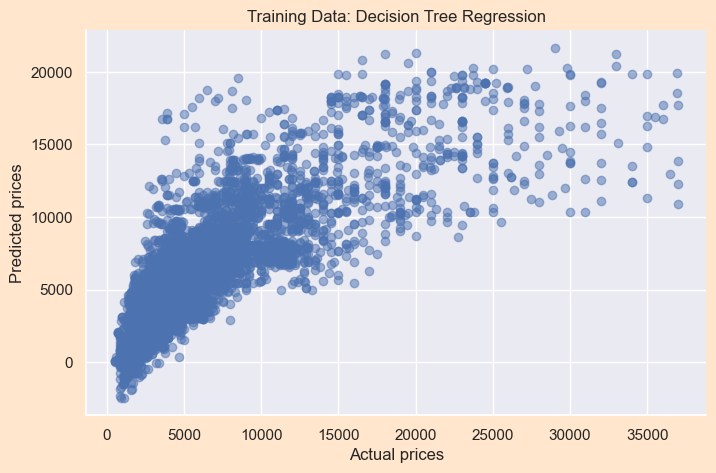

In [63]:
y_pred_train = model.predict(X_train)
mae_score, mse_score, r2_value = find_scores(y_train.values, y_pred_train)

print(f'MAE Train: {mae_score}')
print(f'MSE Train: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_train, y_pred_train, title="Training Data: Decision Tree Regression")

MAE Test: 1583.75311
MSE Test: 6868799.92727
R2 score: 0.65048


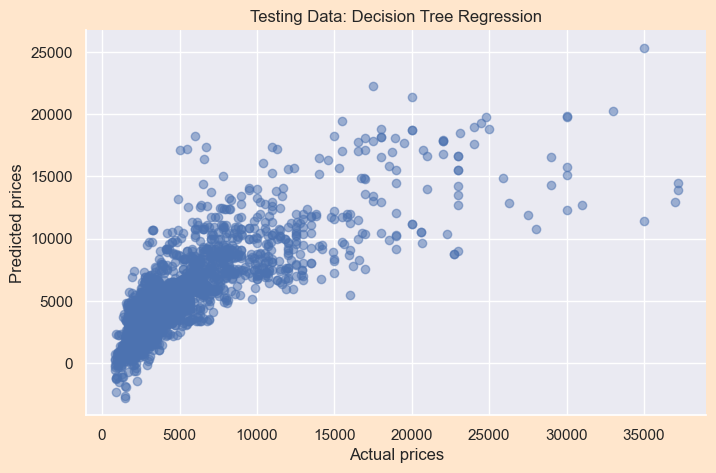

In [64]:
y_pred_test = model.predict(X_test)
mae_score, mse_score, r2_value = find_scores(y_test.values, y_pred_test)

print(f'MAE Test: {mae_score}')
print(f'MSE Test: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_test, y_pred_test, title="Testing Data: Decision Tree Regression")

### **Random Forest Regression**

In [65]:

best_params = best_params_dict['Random Forest Regression']['best_params']

best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)


RandomForestRegressor(min_samples_split=10, random_state=42)

In [66]:
y_pred_train = model.predict(X_train)
mae_score, mse_score, r2_value = find_scores(y_train.values, y_pred_train)

print(f'MAE Train: {mae_score}')
print(f'MSE Train: {mse_score}')
print(f'R2 score: {r2_value}')


MAE Train: 1550.57949
MSE Train: 6687914.44123
R2 score: 0.66559


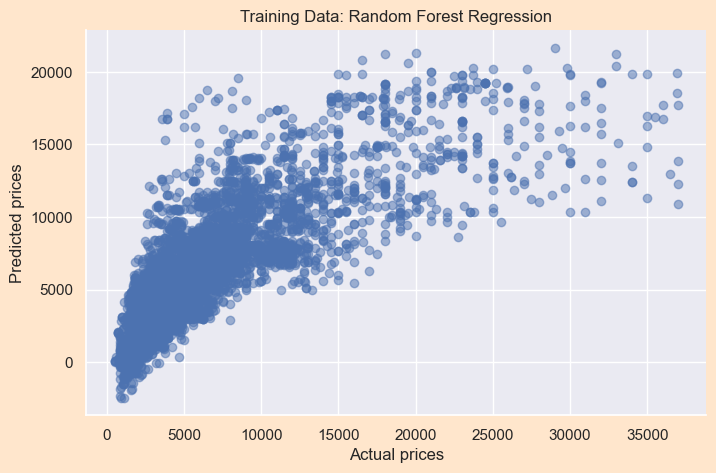

In [67]:
scatter_plot(y_train, y_pred_train, title="Training Data: Random Forest Regression")

In [68]:
y_pred_test = model.predict(X_test)
mae_score, mse_score, r2_value = find_scores(y_test.values, y_pred_test)

print(f'MAE Test: {mae_score}')
print(f'MSE Test: {mse_score}')
print(f'R2 score: {r2_value}')

MAE Test: 1583.75311
MSE Test: 6868799.92727
R2 score: 0.65048


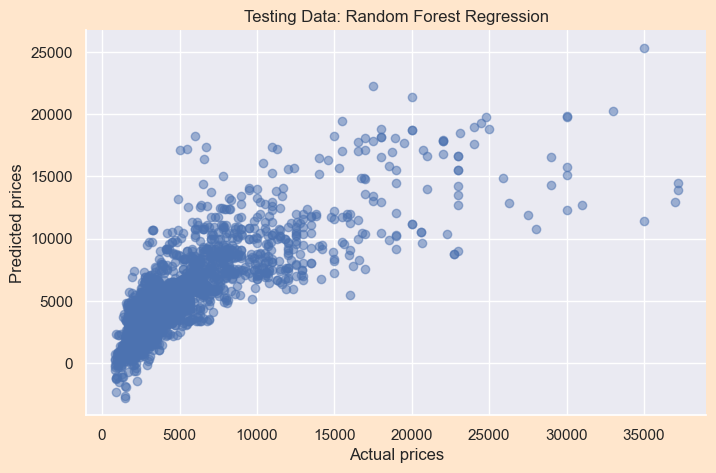

In [69]:
scatter_plot(y_test, y_pred_test, title="Testing Data: Random Forest Regression")

Overall, for all the model, the testing result are in around 0.65, this an average scores, show that our model doesn't works very good.

By the plot, we can see that all models doesn't work for price that is so high (over 25000). In this range of Price, the difference between actual prices and predicted prices can be easily observe.

### Use model to predict the price:
Ưe will use `ElasticNet Regression` to predict the price of apartment with price is `Thoa thuan`:

In [85]:

train = data_to_predict_df.drop(columns=['Price(VNĐ)'])


In [86]:

best_params = best_params_dict['ElasticNet Regression']['best_params']
model = ElasticNet(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(train)

In [89]:
data_to_predict_df.loc[:,'Price(Million)'] = y_pred
